<a href="https://colab.research.google.com/github/gilbert-umuzi/MultiWOZ-SGD-benchmarks/blob/main/multichallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MultiChallenge Data Points with Training Compute:
                        Model           Year  Score  Training compute
0                 o3 (medium)       Apr 2025  59.09      4.000000e+26
1  Claude 3.7 Sonnet Thinking         2025.2  51.58      3.350000e+25
2      GPT-4o (November 2024)  November 2024  27.81      3.800000e+25
3             GPT-4.5 Preview       Feb 2025  43.77      3.000000e+26
4                 DeepSeek V3       Dec 2024  32.19      3.410000e+24
5                    Nova Pro       Jan 2024  20.73      6.000000e+24
6       Qwen 2.5 72B Instruct       Sep 2024  17.34      7.850000e+24
7             Mistral Large 2      July 2024  15.23      2.130000e+25
8     Llama 3.1 405B Instruct      July 2024  16.22      3.800000e+25

Score vs Log Compute Trend Line Calculation:
Coefficients: [  14.85282162 -346.86239135]
Polynomial:  
14.85 x - 346.9
Score increase per 10x compute: 14.85%

Models with maximum score of 59.09%:
         Model  Score  Training compute
0  o3 (medium

<Figure size 1200x800 with 0 Axes>

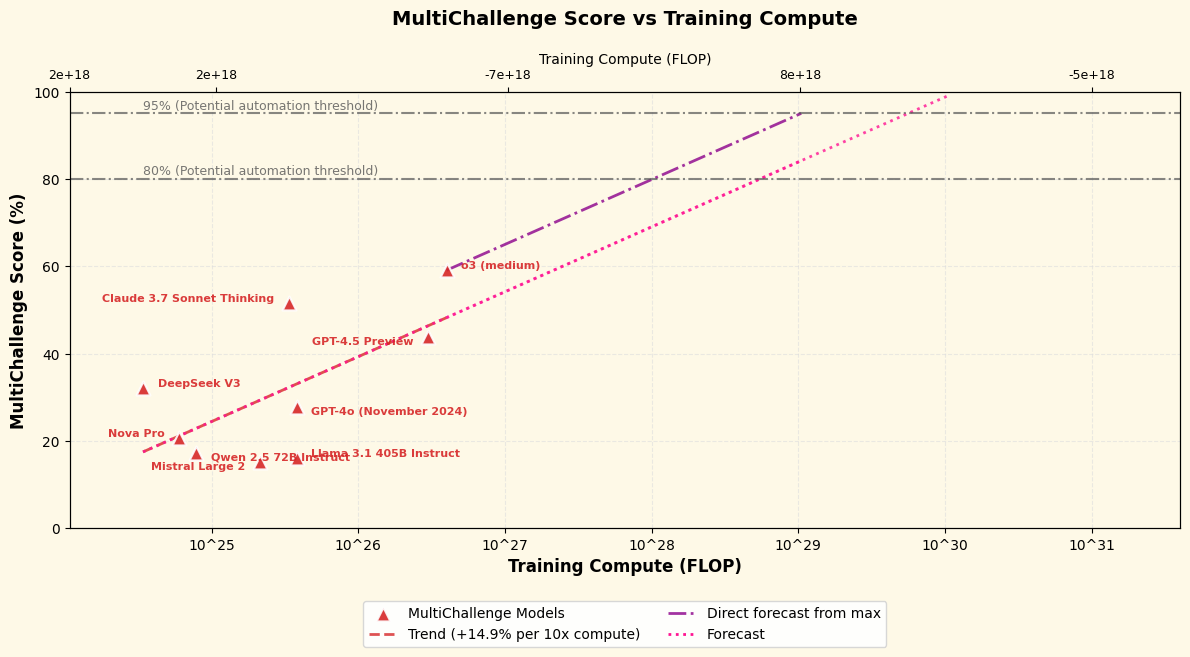

In [6]:
"""
Visualization of MultiChallenge Score vs Training Compute
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math

def create_compute_visualization(data_path):
    """
    Create visualization showing the relationship between MultiChallenge scores
    and training compute (FLOP).

    Parameters:
    - data_path: Path to the CSV file containing MultiChallenge and compute data
    """
    # Define color scheme
    main_color = '#d62728'  # Red
    forecast_color = '#FF1493'  # Hot pink

    # Load the data from CSV
    df = pd.read_csv(data_path)

    # Ensure column names are correct and handle scientific notation in compute
    if 'Training compute (FLOP)' in df.columns:
        df['Training compute'] = df['Training compute (FLOP)']

    # Convert scientific notation if needed
    if df['Training compute'].dtype == object:
        df['Training compute'] = df['Training compute'].apply(
            lambda x: float(x.replace('E+', 'e+') if isinstance(x, str) else x)
        )

    # Display the data being used
    print("MultiChallenge Data Points with Training Compute:")
    print(df[['Model', 'Year', 'Score', 'Training compute']])

    # Create figure
    plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set background color
    bg_color = '#fef9e7'
    ax.set_facecolor(bg_color)
    fig.patch.set_facecolor(bg_color)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.6, color='#dddddd')

    # Transform compute to log scale for plotting and trend analysis
    df['Log Compute'] = np.log10(df['Training compute'])

    # Plot data points
    ax.scatter(df['Log Compute'], df['Score'], color=main_color, marker='^',
               s=100, alpha=0.9, edgecolors='white', linewidth=1.5, zorder=3,
               label='MultiChallenge Models')

    # Calculate trend line if we have enough data points
    if len(df) >= 2:
        x = df['Log Compute'].values
        y = df['Score'].values
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        slope = z[0]  # Score increase per log10 increase in compute

        # Print trend line calculation details
        print("\nScore vs Log Compute Trend Line Calculation:")
        print(f"Coefficients: {z}")
        print(f"Polynomial: {p}")
        print(f"Score increase per 10x compute: {slope:.2f}%")

        # Plot trend line
        x_range = np.linspace(min(x), max(x), 100)
        ax.plot(x_range, p(x_range), color=main_color, linestyle='--',
                linewidth=2, label=f'Trend (+{slope:.1f}% per 10x compute)', alpha=0.8)

        # Plot forecast line
        if slope > 0:
            # Find max compute and corresponding actual max score (not from the trend line)
            max_compute = max(x)
            max_score_idx = df['Score'].idxmax()
            max_score = df.loc[max_score_idx, 'Score']

            # Find models with the max score
            max_score_models = df[df['Score'] == max_score]
            print(f"\nModels with maximum score of {max_score}%:")
            print(max_score_models[['Model', 'Score', 'Training compute']])

            # Calculate compute needed to reach 80% from the actual max score
            compute_to_80 = (80 - max_score) / slope
            forecast_compute_80 = max_compute + compute_to_80

            # Calculate the actual compute value for the 80% threshold
            compute_80 = 10 ** forecast_compute_80
            print(f"\nMultiChallenge Forecast:")
            print(f"Current max log10 compute: {max_compute:.2f} (approx. {10**max_compute:.2e} FLOP)")
            print(f"Current max score: {max_score:.2f}%")
            print(f"Log10 compute increase needed for 80%: {compute_to_80:.2f}")
            print(f"Log10 compute for 80% score: {forecast_compute_80:.2f} (approx. {compute_80:.2e} FLOP)")
            print(f"This represents a {10**compute_to_80:.1f}x increase in compute from current max")

            # Calculate compute needed to reach 95% from the actual max score
            compute_to_95 = (95 - max_score) / slope
            forecast_compute_95 = max_compute + compute_to_95

            # Calculate the actual compute value for the 95% threshold
            compute_95 = 10 ** forecast_compute_95
            print(f"Log10 compute increase needed for 95%: {compute_to_95:.2f}")
            print(f"Log10 compute for 95% score: {forecast_compute_95:.2f} (approx. {compute_95:.2e} FLOP)")
            print(f"This represents a {10**compute_to_95:.1f}x increase in compute from current max")

            # Draw forecast line to 95% threshold (extended)
            max_extended_x = forecast_compute_95 + 1  # Extend a bit further for visibility
            extended_x = np.linspace(min(x), max_extended_x, 100)
            extended_y = p(extended_x)
            # Limit the y values to 100 (for plotting beyond 95%)
            extended_y = np.minimum(extended_y, 100)
            ax.plot(extended_x, extended_y, color=forecast_color, linestyle=':',
                    linewidth=2, alpha=0.8)

            # Add a direct forecast line from the max point using the same slope as the trend line
            # Find the max score model's compute
            max_score_model_compute = df.loc[max_score_idx, 'Log Compute']

            # Create a new line with the same slope but starting from the max point
            # First, calculate where this line would cross the 95% threshold
            x_from_max_to_95 = max_score_model_compute + (95 - max_score) / slope

            # Draw a line with the same slope as the trend line, but starting from max point
            direct_x = np.linspace(max_score_model_compute, x_from_max_to_95, 100)
            direct_y = max_score + slope * (direct_x - max_score_model_compute)
            ax.plot(direct_x, direct_y, color='#8B008B', linestyle='-.',
                    linewidth=2, alpha=0.8, label='Direct forecast from max')

            # Extend trend line to forecast
            extended_x = np.linspace(max_compute, min(forecast_compute_95, max_compute + 3), 100)
            ax.plot(extended_x, p(extended_x), color=forecast_color, linestyle=':',
                    linewidth=2, alpha=0.8)

    # Simple offset pattern for labels to reduce overlap
    def get_offset(i):
        offsets = [(0.1, 1.0), (-0.1, 1.0), (0.1, -1.0), (-0.1, -1.0)]
        return offsets[i % len(offsets)]

    # Label all points
    for i, row in df.iterrows():
        offset_x, offset_y = get_offset(i)
        ax.annotate(row['Model'], (row['Log Compute'] + offset_x, row['Score'] + offset_y),
                   fontsize=8, color=main_color, fontweight='bold', alpha=0.9,
                   ha='left' if offset_x > 0 else 'right', va='center', zorder=4)

    # Add 80% threshold line
    ax.axhline(y=80, color='#555555', linestyle='-.', alpha=0.7, linewidth=1.5)
    ax.text(min(df['Log Compute']), 81, "80% (Potential automation threshold)",
            fontsize=9, color='#555555', alpha=0.8)

    # Add 95% threshold line
    ax.axhline(y=95, color='#555555', linestyle='-.', alpha=0.7, linewidth=1.5)
    ax.text(min(df['Log Compute']), 96, "95% (Potential automation threshold)",
            fontsize=9, color='#555555', alpha=0.8)

    # Set axis limits
    x_min = min(df['Log Compute']) - 0.5
    x_max = max(df['Log Compute']) + 5  # Show some space for forecasting
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, 100)

    # Format x-axis with scientific notation
    def format_func(value, tick_number):
        return f"10^{int(value)}" if value == int(value) else f"10^{value:.1f}"

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    # Set title and labels
    ax.set_title("MultiChallenge Score vs Training Compute",
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Training Compute (FLOP)', fontsize=12, fontweight='bold')
    ax.set_ylabel('MultiChallenge Score (%)', fontsize=12, fontweight='bold')

    # Add forecast line to legend
    forecast_line = Line2D([0], [0], color=forecast_color, linestyle=':',
                           linewidth=2, label='Forecast')

    # Create legend
    handles, labels = ax.get_legend_handles_labels()
    handles.append(forecast_line)

    legend = ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                      frameon=True, framealpha=0.9, edgecolor='lightgray',
                      fontsize=10, ncol=2)
    legend.get_frame().set_facecolor('white')

    # Add second x-axis showing actual compute values
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())

    # Set tick positions for the second x-axis
    tick_positions = np.array([int(i) for i in np.linspace(int(x_min), int(x_max), min(5, int(x_max-x_min)+1))])
    ax2.set_xticks(tick_positions)

    # Format the tick labels to show actual compute values
    tick_labels = [f"{10**pos:.0e}" for pos in tick_positions]
    ax2.set_xticklabels(tick_labels, fontsize=9)
    ax2.set_xlabel('Training Compute (FLOP)', fontsize=10)

    # Adjust layout
    plt.subplots_adjust(top=0.85, bottom=0.20)
    plt.tight_layout(rect=[0, 0.05, 1, 0.90])

    return fig

def main():
    data_path = "multichallenge_compute.csv"

    # Create and save visualization
    fig = create_compute_visualization(data_path)
    plt.savefig('multichallenge_compute_visualization.png', dpi=300, bbox_inches='tight')

    print("\nCreated MultiChallenge vs Compute visualization")
    plt.show()

if __name__ == "__main__":
    main()